In [ ]:
!pip install -q git+https://github.com/huggingface/diffusers.git

In [ ]:
from diffusers import CogView4Pipeline
import torch

pipe = CogView4Pipeline.from_pretrained("THUDM/CogView4-6B", torch_dtype=torch.bfloat16)

pipe.enable_model_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()

In [ ]:
prompt = "A vibrant cherry red sports car sits proudly under the gleaming sun, its polished exterior smooth and flawless, casting a mirror-like reflection. The car features a low, aerodynamic body, angular headlights that gaze forward like predatory eyes, and a set of black, high-gloss racing rims that contrast starkly with the red. A subtle hint of chrome embellishes the grille and exhaust, while the tinted windows suggest a luxurious and private interior. The scene conveys a sense of speed and elegance, the car appearing as if it's about to burst into a sprint along a coastal road, with the ocean's azure waves crashing in the background."
image = pipe(
    prompt=prompt,
    guidance_scale=3.5,
    num_images_per_prompt=1,
    num_inference_steps=50,
    width=512,
    height=512,
).images[0]

image.save("cogview4.png")

  0%|          | 0/50 [00:00<?, ?it/s]

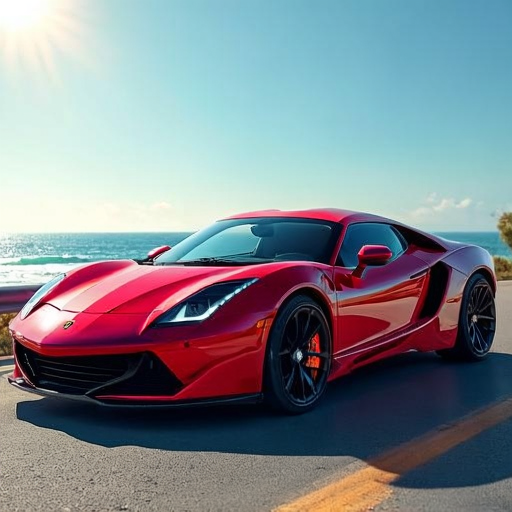

In [ ]:
from PIL import Image
from IPython.display import display

image_path = "/content/cogview4.png"
image = Image.open(image_path)

display(image)

In [ ]:
prompt = "An elephant holding a sign that says silent"
image = pipe(
    prompt=prompt,
    guidance_scale=3.5,
    num_images_per_prompt=1,
    num_inference_steps=20,
    max_sequence_length=100,
    width=512,
    height=512,
).images[0]

image.save("image.png")

  0%|          | 0/20 [00:00<?, ?it/s]

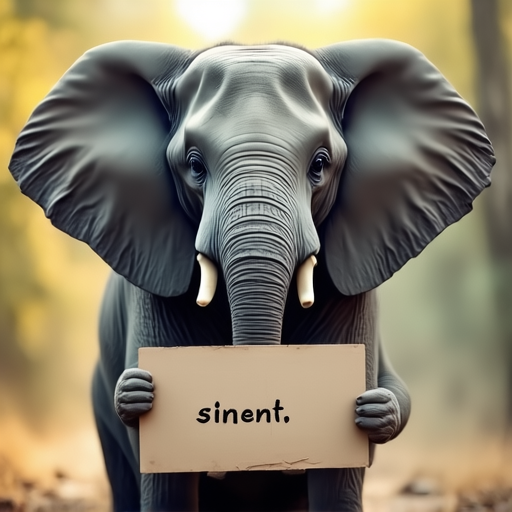

In [ ]:
from PIL import Image
from IPython.display import display

image_path = "/content/image.png"
image = Image.open(image_path)

display(image)

**FluxDev** provides better realism than **CogView4_6B** with the same number of inferences.

In [ ]:
prompt = "Illustration of Newton's Second Law with a cartoon rocket ship. Show force and acceleration arrows, mass label, and equation F = ma in both word and symbol form"
image = pipe(
    prompt=prompt,
    guidance_scale=3.5,
    num_images_per_prompt=1,
    num_inference_steps=30,
    max_sequence_length=100,
    width=512,
    height=512,
).images[0]

image.save("physics.png")

  0%|          | 0/30 [00:00<?, ?it/s]

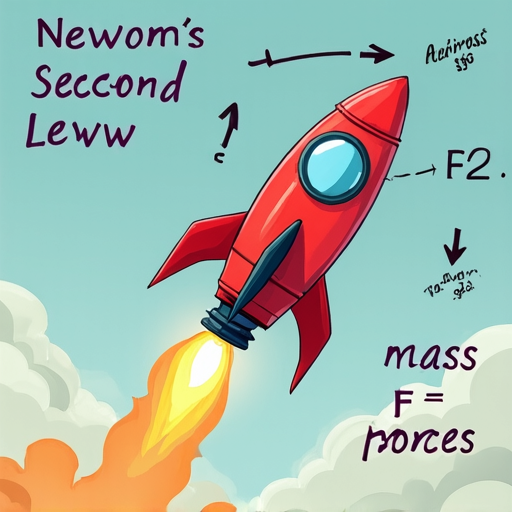

In [ ]:
from PIL import Image
from IPython.display import display

image_path = "/content/physics.png"
image = Image.open(image_path)

display(image)

# Flux

In [2]:
from huggingface_hub import login
from google.colab import userdata

In [3]:
login(token=userdata.get('niru_hf_read'))

In [ ]:
from diffusers import FluxPipeline
import torch

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)

pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()
pipe.to(torch.float16)

In [5]:
prompt = "An elephant holding a sign that says silent"

  0%|          | 0/20 [00:00<?, ?it/s]

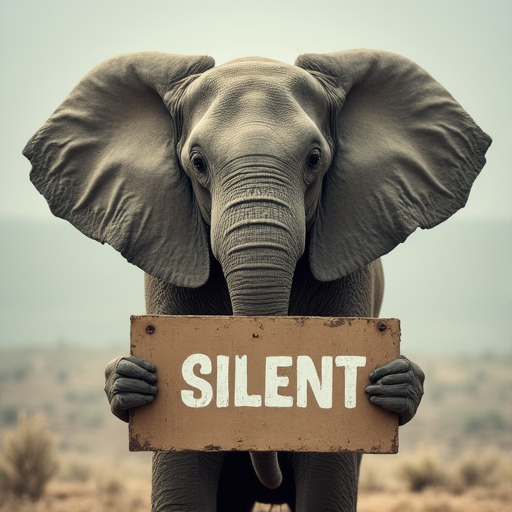

In [7]:
image = pipe(
    prompt=prompt,
    num_images_per_prompt=1,
    guidance_scale=3.5,
    num_inference_steps=20,
    max_sequence_length=100,
    width=512,
    height=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image

In [5]:
prompt = "Illustration of Newton's Second Law with a cartoon rocket ship. Show force and acceleration arrows, mass label, and equation F = ma in both word and symbol form"


  0%|          | 0/30 [00:00<?, ?it/s]

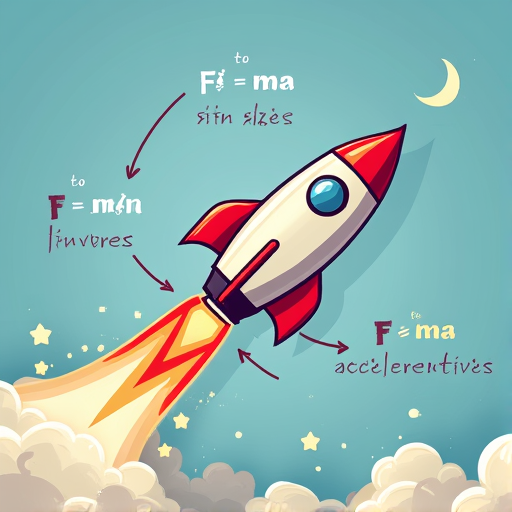

In [6]:
image = pipe(
    prompt=prompt,
    num_images_per_prompt=1,
    guidance_scale=3.5,
    num_inference_steps=30,
    max_sequence_length=100,
    width=512,
    height=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image